# Introduction 

In this notebook we talk about **linear regression** [WIP].

As a first example of regression, we're trying to solve the following problem: given a set of data $\mathcal{D} = \{(x_1,t_1), \dots, (x_N, t_N)\}$ find a polynomial $y(x,w) = w_0 + w_1x^1 + w_mx^m$ that fits the data **and the patterns it may come from**.

# First approach: sum of squares 

A first approach is minimizing

$$ E_\mathcal{D}(w) = \frac{1}{2}\sum_{j=1}^N(y(x_j,w) - t_j)^2$$

that is, minimizing the distance between the target values $t_j$ and the values of the polynomial at $x_j$. After setting $\nabla_w E = 0$, we get the following $m+1$ **normal equations** for the parameters:

$$\sum_{i=0}^m\left(\sum_{j=1}^N x_j^{i+k}\right) w_i = \sum_{j=1}^Nt_jx_j^k,\;\; k\in\{0,\dots,m\}$$

Programming it in python:

In [1]:
def sum_of_squares(x, t, m):
    A = np.zeros((m+1, m+1))
    for k in range(m+1):
        for i in range(m+1):
            A[k, i] = np.sum(x**(i+k))
    b = np.array([np.sum(t*x**k) for k in range(m+1)])
    w = linalg.solve(A, b)
    return w

Let's run it on a sine function with gaussian noise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from scipy import linalg

In [3]:
x = np.linspace(0, 1, 10)
t = np.sin(2*np.pi*x) + np.random.normal(0, 0.1, 10)

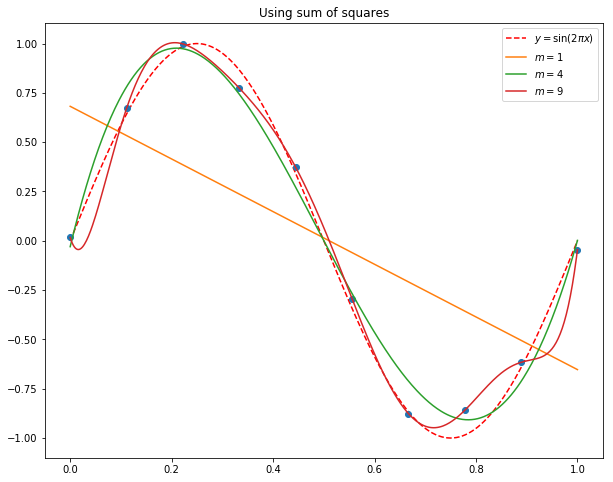

In [7]:
x_bigger = np.linspace(0, 1, 500)
y = np.sin(2 * np.pi * x_bigger)

plt.figure(figsize=(10,8))

plt.plot(x_bigger, y, '--r', label=r'$y=\sin(2\pi x)$')
plt.plot(x, t, 'o')

for m in [1, 4, 9]:
    w = sum_of_squares(x, t, m)
    x_symb = sympy.Symbol('x')
    p = sympy.Poly(w[::-1], x_symb) # it's inverted because of the way sympy constructs polys.
    y_fit = np.array([p.subs(x_symb, x_bigger[k]) for k in range(len(x_bigger))])
    plt.plot(x_bigger, y_fit, label='$m={}$'.format(m))

plt.legend()
plt.title('Using sum of squares')
# plt.savefig('overfitting.pdf', format='pdf')
plt.show()

As we can see, we need to find a way of choosing $m$ (a.k.a. the **model complexity**) such that $y(x,w)$ doesn't **overfit**.

# Adding a regularizing term

One way of minimizing the overfitting is to add a **penalty term** to the error:

$$E(w) = E_\mathcal{D}(w) + \frac{\lambda}{2}\|w\|^2$$

rendering a **regularized** error function, where $\lambda$ is a constant that determines how relevant this penalty term is. Minimizing this with respect to $w$ we end up with a slight variation of the system described above:

$$\sum_{i=0}^m\left(\sum_{j=1}^N x_j^{i+k} + \delta_{ik}\lambda\right) w_i = \sum_{j=1}^Nt_jx_j^k,\;\; k\in\{0,\dots,m\}$$

where $\delta_{ik}$ is just Kronecker's delta. Let's modify the code given above:

In [5]:
def regularization(x, t, m, l):
    A = np.zeros((m+1, m+1))
    for k in range(m+1):
        for i in range(m+1):
            if i == k:
                A[k, i] = np.sum(x**(i+k)) + l
            else:
                A[k, i] = np.sum(x**(i+k))
    b = np.array([np.sum(t*x**k) for k in range(m+1)])
    w = linalg.solve(A, b)
    return w

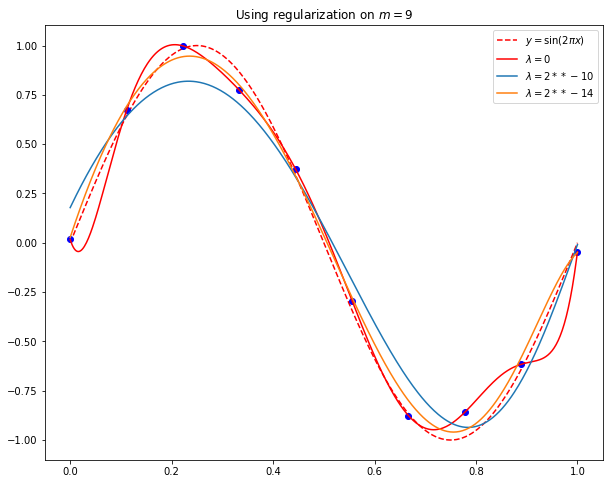

In [8]:
plt.figure(figsize=(10,8))
plt.plot(x_bigger, y, '--r', label=r'$y=\sin(2\pi x)$')
plt.plot(x, t, 'ob')
plt.plot(x_bigger, y_fit, 'r', label='$\lambda = 0$') #y_fit de la pasada.
for k in [-10, -14]:
    w_reg = regularization(x, t, 9, 2 ** (k))
    p = sympy.Poly(w_reg[::-1], x_symb)
    y_reg = np.array([p.subs(x_symb, x_bigger[k]) for k in range(len(x_bigger))])
    plt.plot(x_bigger, y_reg, label='$\lambda = 2 ** {}$'.format(k))
plt.title('Using regularization on $m=9$')
plt.legend()
# plt.savefig("regularization.pdf", format='pdf')
plt.show()